# Part I - Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


,Count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,NaN
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
Count    9381 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB
None


,Count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


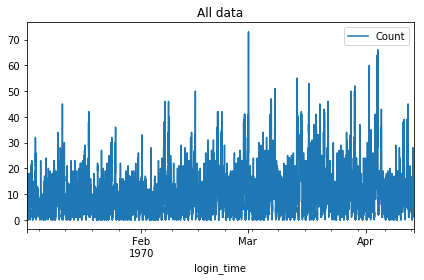

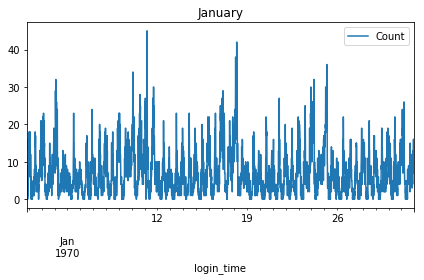

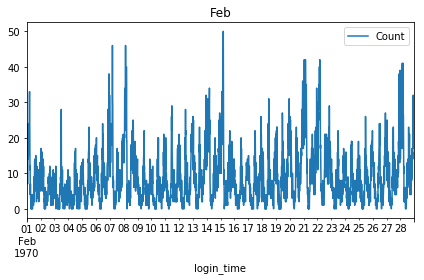

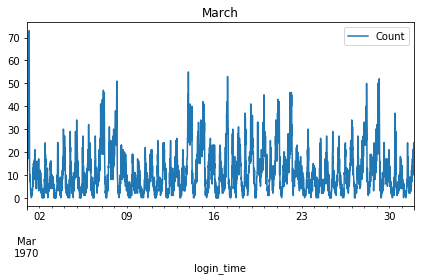

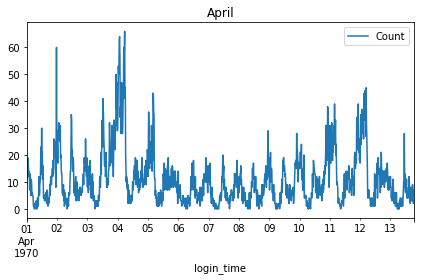

In [19]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#allows pretty print of dataframes
from IPython.display import display


#Opening JSON and then loading file
#login_file = json.load(open("logins.json"))

#1) Reading in json file into pandas dataframe
login_df = pd.read_json("logins.json")
#print(login_df.head())

#looking at info of dataframe
print(login_df.info())

#2) Breaking up date time indexes into 15 min bins and count
#setting index as login_time

#adding a column of 1's to facilitate counting
login_df['Count'] = 1

#Resetting index so that datetimes are the index
login_df = login_df.set_index("login_time")


#Resampling datetime indexes so that they are in 15 min intervals
login_df = login_df.resample("15T").sum()
display(login_df[:20]) # printing first 20 entries


#Checking how many Nans are present
num_nans = len(login_df) - login_df.count() #df.count doesnt count Nans
print(login_df.info())

#filling Nans with 0
login_df = login_df.fillna(0.0)

display(login_df)

#Plotting dataframe 

#plotting all data
plt.figure()
login_df.plot()
plt.title("All data")
plt.tight_layout()

#plotting jan
plt.figure()
login_df.loc["1/1970"].plot()
plt.title("January")
plt.tight_layout()

#plotting feb
plt.figure()
login_df.loc["2/1970"].plot()
plt.title("Feb")
plt.tight_layout()

#plotting march
plt.figure()
login_df.loc["3/1970"].plot()
plt.title("March")
plt.tight_layout()

#plotting april
plt.figure()
login_df.loc["4/1970"].plot()
plt.title("April")
plt.tight_layout()


plt.show()



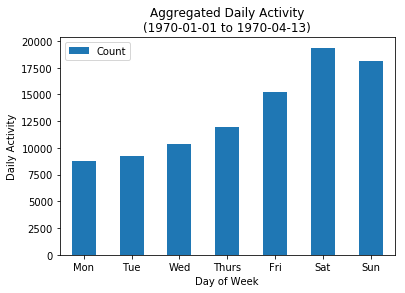

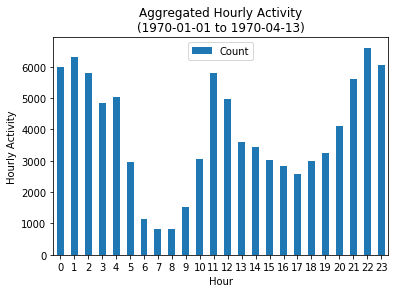

In [20]:
#1) Looking at Daily Activity

#Aggregating time series data by day, finding number of users on daily baisis to investigate weekday and weekend trend
login_daily_all_months_df = login_df.groupby(login_df.index.weekday).sum()
# print(login_daily_all_months_df)

#plotting Daily used over all four months
login_daily_all_months_df.plot(kind='bar')
plt.xticks(np.arange(0,7),["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"], rotation=0 )
plt.title("Aggregated Daily Activity\n(1970-01-01 to 1970-04-13)")
plt.xlabel("Day of Week")
plt.ylabel("Daily Activity")
plt.show()

#2) Looking at Hourly Activity

#using groupby to aggregate by hour
login_hourly_all_months_df = login_df.groupby(login_df.index.hour).sum()
# print(login_hourly_all_months_df)

#plotting hourly activity
login_hourly_all_months_df.plot(kind='bar')

plt.title("Aggregated Hourly Activity\n(1970-01-01 to 1970-04-13)")
plt.xticks(rotation=0)
plt.xlabel("Hour")
plt.ylabel("Hourly Activity")

plt.show()






# Part I - EDA Insights

1) Daily activity spikes as we approach the weekend but is at its peak on Saturday.

2) Hourly activity peaks around lunchtime (1100 - 1200 hours) and at night (2100 - 0300 hours).

# Part II - Experiment & Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

        I would use a ratio quantifing the number of pickups in each city as the key metric for this experiment (ratio = number of pickups in particular city/total number of pickups over analyis period). This metric could be compared before and after implemented strategy was put into effect to determine if the strategy of encouragement generated more pickups in either of the cities.  


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
        Practical experiment would be to count the number of  pickups in each city before and after the encouragement strategy has been implemented. 

    b. what statistical test(s) you will conduct to verify the significance of the observation
        I would used a paired T-test to test the ratios between the same group(i.e., same driver partner) at two different points in time (before and after the encouragement strategy) looking at the ratio of their pickups in each city.

    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        Hypothesis testing would be used to determine if the results are statistically significant. After collecting data for ratios before and after strategy implementation we would peform test with a particular degree of confidence to validate that the ratios are higher than what they would be before new encouragment strategy was implemented. If this is the case we can say with the a certain degree of confidence that the encouragment strategy was effective. 

# Part III - Predictive Modeling

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4



Info of DataFrame:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


None


Descriptive Statistics of DataFrame:



,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


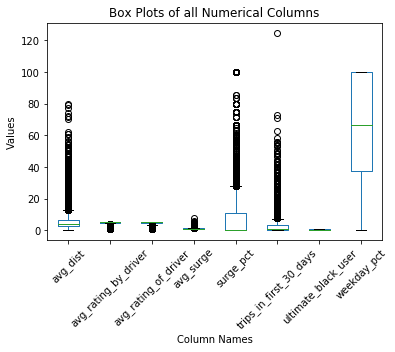



Value counts of phone type:
 iPhone     29352
Android    12093
Name: phone, dtype: int64


Value counts of whether ultimate black user or not:
 False    25526
True     15919
Name: ultimate_black_user, dtype: int64


Value counts on city:
 Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

This is the number or retained users: 12597

The fraction of ultimate black users retained is: 0.303944987333


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [21]:
#opening json file with 'ultimate_data_challenge.json'

file_login_retention = json.load(open("ultimate_data_challenge.json"))

#normalizing json file
login_retention_norm = json_normalize(file_login_retention)

#outputting dataframe to table
# pd.set_option("display.max_rows", 1000)#changing number of rows that show when print
display(login_retention_norm.head())

#dropping all rows with Nans
login_retention_norm = login_retention_norm.dropna()

#investigating info & descriptive statistics after dropping nans from dataframe
print("\nInfo of DataFrame:\n")
display(login_retention_norm.info())
print("\nDescriptive Statistics of DataFrame:\n")
display(login_retention_norm.describe())

#Looking at boxplots to discover potential outliers

login_retention_norm.plot(kind='box')
plt.title("Box Plots of all Numerical Columns")
plt.xlabel("Column Names")
plt.xticks(rotation=45)
plt.ylabel("Values")


plt.show()

#Peforming valuecounts on all categorical columns
print("\n\nValue counts of phone type:\n", login_retention_norm["phone"].value_counts())

print("\n\nValue counts of whether ultimate black user or not:\n", login_retention_norm["ultimate_black_user"].value_counts())

print("\n\nValue counts on city:\n", login_retention_norm["city"].value_counts())

#Calculating fraction of of observed users retained (a user is 'retained' if took trip within last 30 days)
#Finding total number of users that too atleast 1 trip in last 30days
trips_grtr_than_1_last_30days = (np.logical_and(login_retention_norm["trips_in_first_30_days"]>=1,login_retention_norm["last_trip_date"]>="2014-06-01"))
print("\nThis is the number or retained users:",trips_grtr_than_1_last_30days.sum() )

frac_users_retained = trips_grtr_than_1_last_30days.sum()/len(login_retention_norm)
print("\nThe fraction of ultimate black users retained is:", frac_users_retained)


#To make this a supervised problem we must add a column in stating a 'True' if active user
login_retention_norm['active_user'] = trips_grtr_than_1_last_30days

display(login_retention_norm.head())

# Part III - EDA of Ultimate Users Dataset
I) After looking at dataframes information, we can see that there is a lot of missing data in the following columns:

    1) avg_rating_by_driver (50000 values possible & only has 49799 values)

    2) avg_rating_of_driver (50000 values possible & only has 41878 values)

    3) phone                (50000 values possible & only has 49604 values)

**For the purpose of this analysis all rows with missing values will be dropped.** 

II) After dropping all rows with Nan's, we have complete dataset without gaps

III) Looking at boxplots for potential outliers we can see that there may be a potential outlier for 'trips in first 30 days" with a value grater than 120 (It's possible but really stands out)

IV) Performing value counts on categorical data verifies consistency of categorical variables used

V) 30.4% of ultimate black users have been retained within the last month (6/1/2014 - 7/1/2014)

# Part III - Models
### Logistic Regression

In [22]:
#1) Preprocessing DataFrame for Modelling

#a) To reduce categorical variables going to reduce full dates just to months (not using signups since all in the same month and year)
# login_retention_norm["last_trip_date_month"]=pd.DatetimeIndex(login_retention_norm["last_trip_date"]).month
#display(login_retention_norm.head())

#b) Dropping unnecessary columns
col_to_drop = ["last_trip_date", "signup_date"]
login_retention_norm_drop = login_retention_norm.drop(col_to_drop, axis=1)
#display(login_retention_norm_drop.head())

#c) Converting categorical variables into dummy variables (dropping first dummy columns)
ultimate_df_ready_w_dummys = pd.get_dummies(login_retention_norm_drop, drop_first=True)
display(ultimate_df_ready_w_dummys.head())


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user,city_King's Landing,city_Winterfell,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,True,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,False,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,False,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,True,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,False,0,1,0


In [23]:
#2) Feature Selection with Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#a) Selecting features and target variable

X = ultimate_df_ready_w_dummys.drop("active_user", axis=1)#keeping all coulmns (features) except "active_user"
Y = ultimate_df_ready_w_dummys["active_user"]

#b) Instantiating model and & using Recursive Feature Elimination(RFE)
model_logreg = RandomForestClassifier(class_weight='balanced')

#RFE
rfe = RFE(model_logreg,3) #calling RFE with model and number of best features we would like to keep

rfe = rfe.fit(X, Y) #fitting rfe with features and target variable

features_selected = rfe.support_ #indicates whether feature is selected or not (True or False)
features_selected_rank = rfe.ranking_ #gives ranking of feature (lower is better)
# print(rfe.support_) 
# print(rfe.ranking_) 

#Finding column names of features selected
orig_columns = X.columns.values #orignal column names in list form
#print(orig_columns)

selected_column_names = np.array(orig_columns) * features_selected

#cleaning up list of selected column names, removing empty strings
final_selected_column_names = [x for x in selected_column_names if len(x)>1]
print("These are the Features that have been selcted via RFE:\n\n", final_selected_column_names)




These are the Features that have been selcted via RFE:

 ['avg_dist', 'trips_in_first_30_days', 'weekday_pct']


Accuracy of trained model: 0.986712994241
Accuracy of tested Predictions:  0.833140320401


Confusion Matrix for Classification Model:

 [[6480  720]
 [1009 2153]]


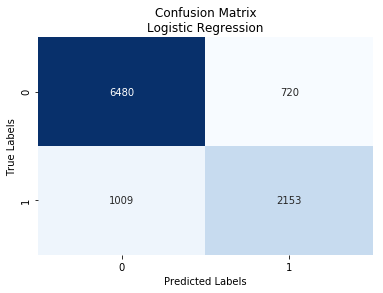

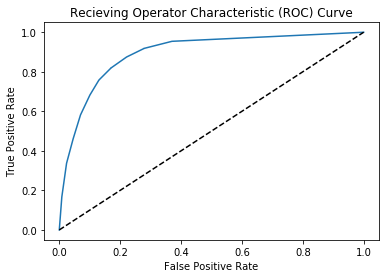

The AUC is:  0.894036057523


In [24]:
#3) Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

#Splitting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.25, random_state=42)

#training Logistic Regression Model
model_logreg.fit(X_train, Y_train)

#making predictions with trained model
Y_pred = model_logreg.predict(X_test)

#Accuracy of trained model
print("Accuracy of trained model:", model_logreg.score(X_train, Y_train))

#Accuracy of predictions
print("Accuracy of tested Predictions: ",accuracy_score(Y_test, Y_pred))

#Printing confusion Matrix
logreg_confusion_matrix = confusion_matrix(Y_test, Y_pred, labels=[0,1])
print("\n\nConfusion Matrix for Classification Model:\n\n",logreg_confusion_matrix)

plt.figure()
sns.heatmap(logreg_confusion_matrix, annot=True, cbar=False, cmap="Blues", fmt="d") 
#string formatting 'd' gives decimal integer
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix\nLogistic Regression")

plt.show()

##Investigationg ROC Curve for model
# ROC curve is just a way to visually inspect pefromance of binary clasifier. 
#Compares rate at which model makes correct (True Positive Rate) vs. False (False Positive Rate) predictions

from sklearn.metrics import roc_curve, roc_auc_score

Y_pred_prob = model_logreg.predict_proba(X_test)[:,1] #picing up class 1 probabilites, which we are interested in predicting
# print(Y_pred_prob)
false_positive, true_positive, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.plot(false_positive, true_positive) #plotting false postive rate (x) vs. true positive rate (y)

plt.plot([0,1], [0,1], 'k--')# plotting guessing line to put model performance in perspective
plt.title("Recieving Operator Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#finding Area Under ROC Curve
print("The AUC is: ", roc_auc_score(Y_test, Y_pred_prob))


# Part III Summary of Modeling Efforts

1) All missing data was dropped from dataframe used to build predictive model to determine if a user will be active or not.

2) Logistic Regression and Random Forest were used to build predictive models.

### Logistic Regression

    a) Through Recursive Feature Elimination (RFE) top 3 features are: 'ultimate_black_user', "city_King's Landing", 'phone_iPhone'
    
    b) Using ROC curve it was found that AUC is .81, telling us that  81% of time model predicts an active user correctly
    
### Random Forest

    a) Through RFE to 3 features are: 'avg_dist', 'trips_in_first_30_days', 'weekday_pct'
    
    b) Using ROC curve it was found that AUC is .89, telling us that  89% of time model predicts an active user correctly
    
## Conlusion

Comparing both preditive models, Random Forest seems to be doing a better job at predicting whether or not a user is 'active'. The average distance of the users trip and number of trips the user took in the first 30 days after signing up along with the fraction of usertrips during the weekday are all important variables in predicting future rider retention. To increase rider rention, ultimate could offer a promotion for discounted weekday rides  within the first 30 days of users signup. Also the ultimate could investigate differnces between using app on an iphone vs. an androind phone and what's so special about Kings Landing.

    